### Assignment 1: Handling Missing Data in an E-Commerce Orders Dataset
Objective:
To analyze and clean an e-commerce dataset by identifying and handling missing values using various imputation techniques.
Instructions:
Load the provided dataset into Pandas.
Identify missing data:
Use isna() and info() functions to detect missing values.
Compute the percentage of missing values for each column.
Analyze missing data patterns:
Determine whether data is MCAR, MAR, or MNAR.
Visualize missing data patterns using seaborn.heatmap().
Handle missing values:
Apply different imputation techniques:
Mean/Median imputation for numerical columns (e.g., Product_Price).
Mode imputation for categorical columns (e.g., Product_Category).
Forward fill or backward fill for date-related fields.
K-Nearest Neighbors (KNN) imputation for complex cases.
Evaluate the impact:
Compare summary statistics before and after imputation.
Visualize the imputed values using histograms or boxplots.
Prepare a report:
Document findings, methods used, and final observations.
Submit a Jupyter Notebook with the cleaned dataset.

Missing Values Percentage:
 Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64


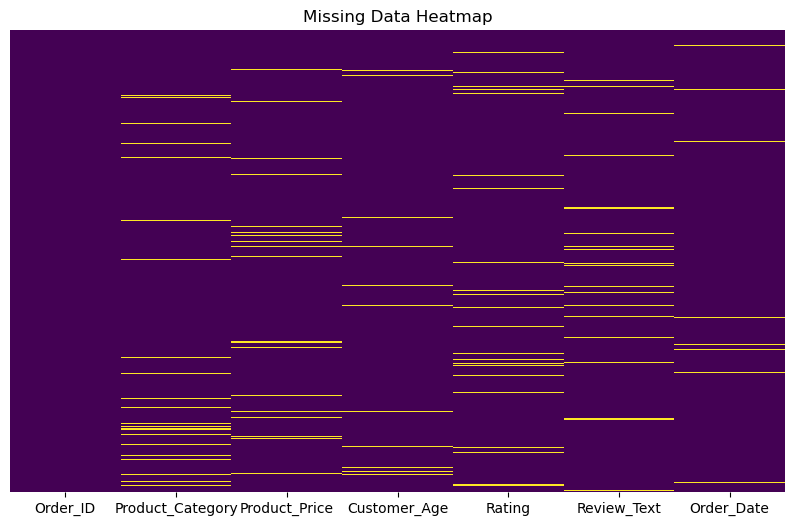

C:\Users\shsva\AppData\Local\Temp\ipykernel_12260\2442337592.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)
C:\Users\shsva\AppData\Local\Temp\ipykernel_12260\2442337592.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

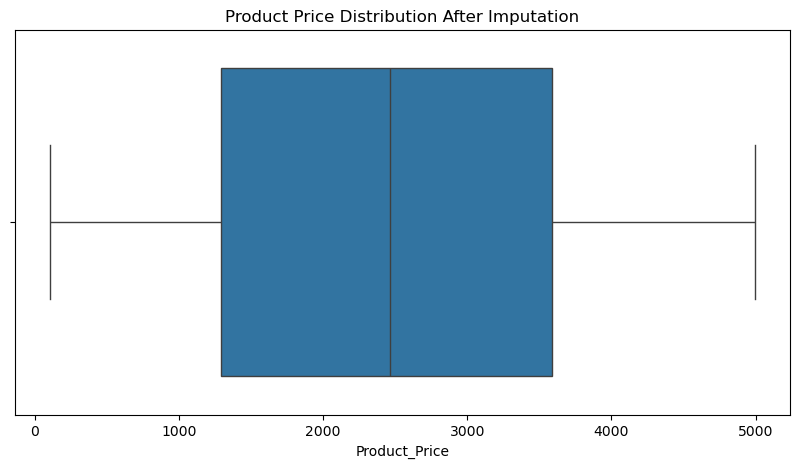

Data cleaning complete. File saved as 'Cleaned_E-Commerce_Data.csv'


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Load dataset
df = pd.read_csv("E-Commerce_Data.csv")

# Identify missing data
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values Percentage:\n", missing_percentage)

# Visualize missing data patterns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handle missing values
# Mode Imputation for categorical columns
df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)

# Mean/Median Imputation for numerical columns
df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# KNN Imputation for Customer_Age
knn_imputer = KNNImputer(n_neighbors=5)
df[['Customer_Age']] = knn_imputer.fit_transform(df[['Customer_Age']])

# Forward Fill for date-related fields
df['Order_Date'].fillna(method='ffill', inplace=True)

# Fill missing Review_Text with "No review provided"
df['Review_Text'].fillna("No review provided", inplace=True)

# Evaluate the impact of imputation
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Product_Price'])
plt.title("Product Price Distribution After Imputation")
plt.show()

# Save cleaned dataset
df.to_csv("E-Commerce_Data.csv", index=False)
print("Data cleaning complete. File saved as 'Cleaned_E-Commerce_Data.csv'")
